In [1]:
import sumie
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import skimage

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
model = torchvision.models.vgg16(pretrained=True).eval()
sumie.utils.remove_inplace(model)
#model.avgpool = torch.nn.AdaptiveAvgPool2d((1, 1))
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), pad

100%|██████████| 200/200 [00:16<00:00, 11.83it/s]


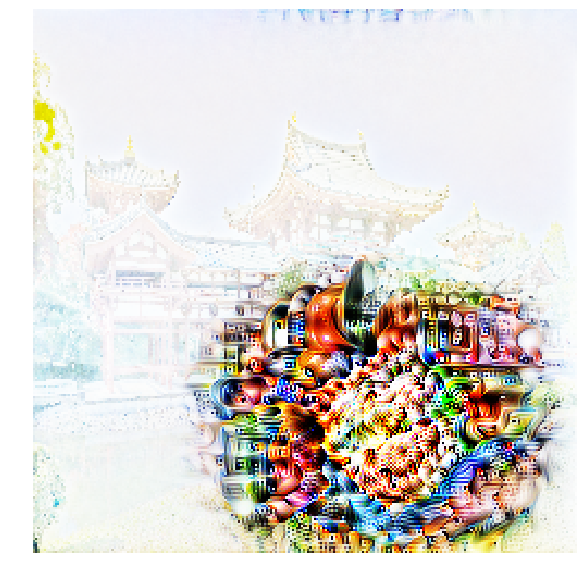

In [29]:
url = 'https://upload.wikimedia.org/wikipedia/commons/6/69/Phoenix_Hall%2C_Byodo-in%2C_November_2016_-01.jpg'
imsize = 250
base_image = sumie.io.load_url(url, size=(imsize, imsize))

im = sumie.Image(imsize, param='fft', transforms=[
                    sumie.transforms.PositionJitter(8),
                    sumie.transforms.Normalise(),
              ], init=base_image)

device = 'cuda'
im.to(device)
model.to(device)

def grab(x):
    return x[6,6]

whiteness = sumie.objectives.White(im)
channel = sumie.objectives.ConvChannel(model.features[28], 0, func=torch.max)
combined = sumie.objectives.Composite([channel, whiteness], [0.01, 1])

opt = sumie.Optimiser(im, model.features, combined)
opt.run(iterations=200, lr=0.1, progress=True)
sumie.vis.show(im.get_image(), figsize = (10, 10))

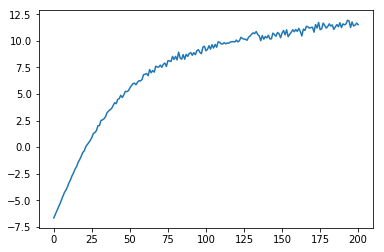

In [25]:
plt.plot([x.item() for x in opt.history])

In [5]:
im.get_image()

tensor([[[[0.0661, 0.9245, 0.4854,  ..., 0.0063, 0.0394, 0.0117],
          [0.9257, 0.9406, 0.5770,  ..., 0.0013, 0.0050, 0.0111],
          [0.9781, 0.7393, 0.8108,  ..., 0.0256, 0.0270, 0.1796],
          ...,
          [0.4094, 0.0963, 0.0639,  ..., 0.2822, 0.0401, 0.0105],
          [0.1004, 0.0543, 0.4570,  ..., 0.1175, 0.1887, 0.3716],
          [0.0276, 0.2106, 0.8567,  ..., 0.1132, 0.8703, 0.6347]],

         [[0.1358, 0.9476, 0.8165,  ..., 0.0085, 0.0588, 0.0160],
          [0.9615, 0.9652, 0.8074,  ..., 0.0024, 0.0113, 0.0164],
          [0.9794, 0.6982, 0.7743,  ..., 0.0197, 0.0304, 0.1872],
          ...,
          [0.6971, 0.3533, 0.2373,  ..., 0.2947, 0.0360, 0.0082],
          [0.2942, 0.2268, 0.8421,  ..., 0.1362, 0.1118, 0.3087],
          [0.0568, 0.6883, 0.9484,  ..., 0.0678, 0.6585, 0.6458]],

         [[0.8584, 0.9857, 0.9875,  ..., 0.0118, 0.0348, 0.0242],
          [0.9852, 0.9874, 0.9695,  ..., 0.0072, 0.0249, 0.0312],
          [0.9865, 0.9653, 0.9242,  ..., 0